# Bachelor Thesis Survey

## Load and prep data

In [3]:
# !pip install wordcloud

from aifc import Error
import os
import fnmatch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
from wordcloud import WordCloud
from collections import Counter


# Dateipfad zur CSV-Datei
file_path = 'data/survey.csv'

# Lese die CSV-Datei, getrennt durch Semikolons
df = pd.read_csv(file_path, sep=';')


# Zeige die ersten paar Zeilen der Daten an
df.head()


,Response ID,Date submitted,Last page,Start language,Seed,Date started,Date last action,What is your gender?,How old are you?,What is your field of study?,...,Group time: Use of Collaboration Tools.1,Question time: G02Q03,Group time: Use of Collaboration Tools.2,Question time: G02Q07,Group time: Use of Collaboration Tools.3,Question time: G02Q08,Question time: G05Q14,Question time: G01Q09,Group time: Conclusion,Question time: G03Q06
0,1,2024-03-27 11:04:56,6,en,1996597920,2024-03-27 11:01:46,2024-03-27 11:04:56,Male,20-24,"Science, Technology, Engineering and Mathematics",...,28.41,NaN,28.32,NaN,39.27,NaN,NaN,NaN,2.83,NaN
1,2,2024-03-27 11:22:10,6,en,697215376,2024-03-27 11:15:47,2024-03-27 11:22:10,Male,20-24,Business and Economics,...,61.60,NaN,67.69,NaN,83.80,NaN,NaN,NaN,46.74,NaN
2,3,2024-03-27 13:37:22,6,en,866539392,2024-03-27 13:29:01,2024-03-27 13:37:22,Female,20-24,Law,...,22.41,NaN,31.18,NaN,67.86,NaN,NaN,NaN,12.49,NaN
3,4,2024-03-27 16:57:20,6,en,1389161845,2024-03-27 16:50:11,2024-03-27 16:57:20,Male,20-24,"Science, Technology, Engineering and Mathematics",...,43.67,NaN,32.87,NaN,86.19,NaN,NaN,NaN,2.29,NaN
4,5,2024-03-27 18:29:30,6,en,1296586762,2024-03-27 18:27:15,2024-03-27 18:29:30,Male,20-24,"Science, Technology, Engineering and Mathematics",...,16.34,NaN,18.91,NaN,33.72,NaN,NaN,NaN,2.68,NaN


In [4]:
# Count missing values
print(pd.isna(df).sum())

print('Dimension:', df.shape)

Response ID                 0
Date submitted             82
Last page                   0
Start language              0
Seed                        0
                         ... 
Question time: G02Q08     350
Question time: G05Q14     350
Question time: G01Q09     350
Group time: Conclusion     82
Question time: G03Q06     350
Length: 81, dtype: int64
Dimension: (350, 81)


Yes    311
No      16
Name: Do you work with collaboration tools during your studies? (Microsoft Teams, Zoom, Trello, GitHub,...), dtype: int64


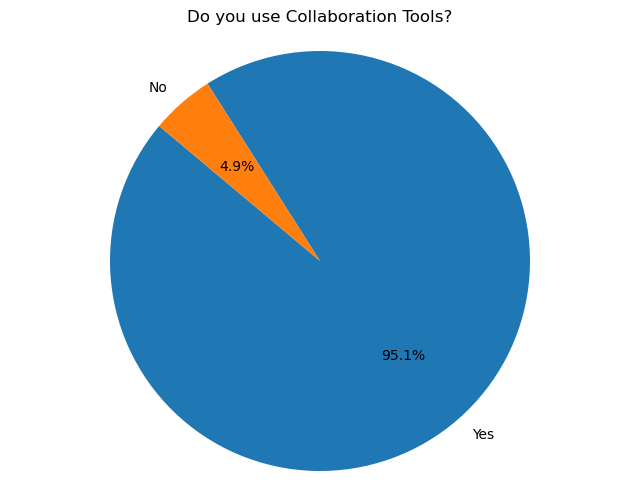

In [5]:
counts = df['Do you work with collaboration tools during your studies? (Microsoft Teams, Zoom, Trello, GitHub,...)'].value_counts()

# Anzeigen der Zählungen
print(counts)

# Erstellen des Kuchendiagramms
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Do you use Collaboration Tools?')
plt.show()

In [6]:
# List of columns to remove
columns_to_remove = ['Date submitted', 'Last page', 'Start language', 'Seed', 'Date started', 'Date last action']

# Drop columns if they exist in the DataFrame
df.drop([col for col in columns_to_remove if col in df.columns], axis=1, inplace=True)

# Remove columns containing certain strings
df = df[df.columns[~df.columns.str.contains('Question time|Group time|Total time')]]

# Remove rows where the Microsoft Teams column is empty
df = df[df['What collaboration tools do you use and how often do you use them?  [Jira]'].notna()]


In [7]:
df.head(3)

,Response ID,What is your gender?,How old are you?,What is your field of study?,What is your field of study? [Other],What language is primarily spoken in your courses?,"Do you work with collaboration tools during your studies? (Microsoft Teams, Zoom, Trello, GitHub,...)",What collaboration tools do you use and how often do you use them? [Microsoft Teams],What collaboration tools do you use and how often do you use them? [Zoom],"What collaboration tools do you use and how often do you use them? [Google Workspace (Docs, Sheets, Slides)]",...,"What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Technical issues (e.g., connectivity problems, software glitches)]",What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Lack of familiarity with the tools],What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Difficulty maintaining effective communication with my team members],What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Lack of engagement or participation from team members],What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Difficulty in managing and organizing shared documents and resources],What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Privacy and security concerns],What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Inadequate support and training on the use of digital tools],Are there any other difficulties you encounter when using collaboration tools that have not been mentioned?,How strongly do you feel the use of digital collaboration tools has impacted your academic performance positively?,"Please feel free to share any additional questions, suggestions, or comments you might have regarding digital collaboration tools or your experience using them."
0,1,Male,20-24,"Science, Technology, Engineering and Mathematics",NaN,(Swiss-)German,Yes,Daily,Weekly,Weekly,...,Sometimes,Often,Often,Rarely,Rarely,Never,Often,NaN,Very,NaN
1,2,Male,20-24,Business and Economics,NaN,English,Yes,Several times a week,Several times a week,Less frequently,...,Rarely,Rarely,Never,Rarely,Rarely,Never,Rarely,NaN,Very,keine
2,3,Female,20-24,Law,NaN,(Swiss-)German,Yes,Weekly,Weekly,Never,...,Sometimes,Sometimes,Rarely,Often,Rarely,Rarely,Rarely,NaN,Very,NaN


In [8]:

for spaltenname in df.columns:
    print(spaltenname)


Response ID
What is your gender?
How old are you?
What is your field of study?
What is your field of study? [Other]
What language is primarily spoken in your courses?
Do you work with collaboration tools during your studies? (Microsoft Teams, Zoom, Trello, GitHub,...)
What collaboration tools do you use and how often do you use them?  [Microsoft Teams]
What collaboration tools do you use and how often do you use them?  [Zoom]
What collaboration tools do you use and how often do you use them?  [Google Workspace (Docs, Sheets, Slides)]
What collaboration tools do you use and how often do you use them?  [Slack]
What collaboration tools do you use and how often do you use them?  [Trello]
What collaboration tools do you use and how often do you use them?  [Notion]
What collaboration tools do you use and how often do you use them?  [Miro]
What collaboration tools do you use and how often do you use them?  [Mural]
What collaboration tools do you use and how often do you use them?  [GitHub]
Wh

In [9]:
# neue Spaltennamen Mapping
new_column_names = {
    "Response ID": "ID",
    "What is your gender?": "Gender",
    "How old are you?": "Age",
    "What is your field of study?": "FieldOfStudy",
    "What is your field of study? [Other]": "FieldOfStudy_Other",
    "What language is primarily spoken in your courses?": "CourseLanguage",
    "Do you work with collaboration tools during your studies? (Microsoft Teams, Zoom, Trello, GitHub,...)": "UseCollabTools",
    "What collaboration tools do you use and how often do you use them?  [Microsoft Teams]": "Teams",
    "What collaboration tools do you use and how often do you use them?  [Zoom]": "Zoom",
    "What collaboration tools do you use and how often do you use them?  [Google Workspace (Docs, Sheets, Slides)]": "GoogleWorkspace",
    "What collaboration tools do you use and how often do you use them?  [Slack]": "Slack",
    "What collaboration tools do you use and how often do you use them?  [Trello]": "Trello",
    "What collaboration tools do you use and how often do you use them?  [Notion]": "Notion",
    "What collaboration tools do you use and how often do you use them?  [Miro]": "Miro",
    "What collaboration tools do you use and how often do you use them?  [Mural]": "Mural",
    "What collaboration tools do you use and how often do you use them?  [GitHub]": "GitHub",
    "What collaboration tools do you use and how often do you use them?  [Monday.com]": "Monday",
    "What collaboration tools do you use and how often do you use them?  [Asana]": "Asana",
    "What collaboration tools do you use and how often do you use them?  [Jira]": "Jira",
    "What collaboration tools do you use and how often do you use them?  [Other (write below)]": "OtherCollaborationTools",
    "Do you use any other tools that are not mentioned above?": "UseOtherTools",
    "Is the following criteria important in the selection of a collaboration tool for you?  [User-friendliness]": "UserFriendliness",
    "Is the following criteria important in the selection of a collaboration tool for you?  [Functionality and feature set]": "Functionality",
    "Is the following criteria important in the selection of a collaboration tool for you?  [Integration with other tools]": "Integration",
    "Is the following criteria important in the selection of a collaboration tool for you?  [Scalability (Ability to increase or decrease in performance)]": "Scalability",
    "Is the following criteria important in the selection of a collaboration tool for you?  [Cost (Expense involved in purchase and maintenance)]": "Cost",
    "Is the following criteria important in the selection of a collaboration tool for you?  [Privacy and security]": "PrivacySecurity",
    "Is the following criteria important in the selection of a collaboration tool for you?  [Reliability and availability]": "Reliability",
    "Is the following criteria important in the selection of a collaboration tool for you?  [Mobility and access (Ease of access from various locations/devices)]": "Mobility",
    "Is the following criteria important in the selection of a collaboration tool for you?  [Customizability (personalize according to needs)]": "Customizability",
    "Is the following criteria important in the selection of a collaboration tool for you?  [Feedback and evaluation features]": "Feedback",
    "Is the following criteria important in the selection of a collaboration tool for you?  [Accessibility (Usable for as many people as possible)]": "Accessibility",
    "Is the following criteria important in the selection of a collaboration tool for you?  [Reputation of the provider]": "Reputation",
    "Please mark what applies to you.  [The use of collaboration tools has improved collaboration with my fellow students.]": "ImpactOnCollaboration",
    "Please mark what applies to you.  [Collaboration tools have made group projects more organized and manageable.]": "ImpactOnOrganization",
    "Please mark what applies to you.  [Collaboration tools have improved the ability to coordinate tasks and deadlines within my team.]": "ImpactOnCoordination",
    "Please mark what applies to you.  [Collaboration tools facilitate communication with lecturers and the exchange of feedback.]": "ImpactOnCommunication",
    "Please mark what applies to you.  [My active participation and engagement in class have increased through the use of these tools.]": "ImpactOnParticipation",
    "Please mark what applies to you.  [The use of collaboration tools has increased my motivation to learn.]": "ImpactOnMotivation",
    "Please mark what applies to your institution.  [I am satisfied with the variety of digital collaboration tools offered by my institution.]": "SatisfactionWithToolsVariety",
    "Please mark what applies to your institution.  [My institution integrates digital collaboration tools into the curriculum effectively.]": "EffectiveToolIntegration",
    "Please mark what applies to your institution.  [The training sessions on digital collaboration tools provided by my institution are adequate.]": "AdequacyOfTraining",
    "Please mark what applies to your institution.  [My institution's helpdesk support effectively resolves issues related to digital collaboration tools.]": "EffectivenessOfSupport",
    "Please mark what applies to your institution.  [I feel involved in the decision-making process regarding the selection of digital collaboration tools at my institution.]": "InvolvementInDecisionMaking",
    "What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Technical issues (e.g., connectivity problems, software glitches)]": "ChallengeTechnicalIssues",
    "What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Lack of familiarity with the tools]": "ChallengeFamiliarity",
    "What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Difficulty maintaining effective communication with my team members]": "ChallengeCommunication",
    "What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Lack of engagement or participation from team members]": "ChallengeEngagement",
    "What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Difficulty in managing and organizing shared documents and resources]": "ChallengeOrganization",
    "What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Privacy and security concerns]": "ChallengePrivacySecurity",
    "What are the most significant challenges you face while collaborating using digital tools and how often does it happen? [Inadequate support and training on the use of digital tools]": "ChallengeSupportTraining",
    "Are there any other difficulties you encounter when using collaboration tools that have not been mentioned?": "OtherDifficulties",
    "How strongly do you feel the use of digital collaboration tools has impacted your academic performance positively?": "ImpactOnAcademicPerformance",
    "Please feel free to share any additional questions, suggestions, or comments you might have regarding digital collaboration tools or your experience using them.": "AdditionalComments"
}

# Benenne die Spalten um
df.rename(columns=new_column_names, inplace=True)

for spaltenname in df.columns:
    print(spaltenname)

ID
Gender
Age
FieldOfStudy
FieldOfStudy_Other
CourseLanguage
UseCollabTools
Teams
Zoom
GoogleWorkspace
Slack
Trello
Notion
Miro
Mural
GitHub
Monday
Asana
Jira
OtherCollaborationTools
UseOtherTools
UserFriendliness
Functionality
Integration
Scalability
Cost
PrivacySecurity
Reliability
Mobility
Customizability
Feedback
Accessibility
Reputation
ImpactOnCollaboration
ImpactOnOrganization
ImpactOnCoordination
ImpactOnCommunication
ImpactOnParticipation
ImpactOnMotivation
SatisfactionWithToolsVariety
EffectiveToolIntegration
AdequacyOfTraining
EffectivenessOfSupport
InvolvementInDecisionMaking
ChallengeTechnicalIssues
ChallengeFamiliarity
ChallengeCommunication
ChallengeEngagement
ChallengeOrganization
ChallengePrivacySecurity
ChallengeSupportTraining
OtherDifficulties
ImpactOnAcademicPerformance
AdditionalComments


In [10]:


df.head(3)




,ID,Gender,Age,FieldOfStudy,FieldOfStudy_Other,CourseLanguage,UseCollabTools,Teams,Zoom,GoogleWorkspace,...,ChallengeTechnicalIssues,ChallengeFamiliarity,ChallengeCommunication,ChallengeEngagement,ChallengeOrganization,ChallengePrivacySecurity,ChallengeSupportTraining,OtherDifficulties,ImpactOnAcademicPerformance,AdditionalComments
0,1,Male,20-24,"Science, Technology, Engineering and Mathematics",NaN,(Swiss-)German,Yes,Daily,Weekly,Weekly,...,Sometimes,Often,Often,Rarely,Rarely,Never,Often,NaN,Very,NaN
1,2,Male,20-24,Business and Economics,NaN,English,Yes,Several times a week,Several times a week,Less frequently,...,Rarely,Rarely,Never,Rarely,Rarely,Never,Rarely,NaN,Very,keine
2,3,Female,20-24,Law,NaN,(Swiss-)German,Yes,Weekly,Weekly,Never,...,Sometimes,Sometimes,Rarely,Often,Rarely,Rarely,Rarely,NaN,Very,NaN


In [11]:
import os

# Pfad zum Speichern der CSV-Datei
save_path = 'data/'

# Überprüfen, ob der Ordner existiert, andernfalls erstellen
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Name der CSV-Datei
csv_filename = 'survey_cleaned.csv'

# Vollständiger Pfad zur CSV-Datei
csv_file_path = os.path.join(save_path, csv_filename)

# DataFrame in CSV schreiben
df.to_csv(csv_file_path, index=False)

print(f"Die Datei wurde erfolgreich unter '{csv_file_path}' gespeichert.")


Die Datei wurde erfolgreich unter 'data/survey_cleaned.csv' gespeichert.


### DF with numbers

In [12]:
df_numbers = df

exclude_columns = [
    'ID', 'Gender', 'Age', 'FieldOfStudy', 
    'FieldOfStudy_Other', 'CourseLanguage', 'UseCollabTools', 'OtherDifficulties', 'AdditionalComments'
]

comprehensive_mapping = {
    'Daily': 4, 'Several times a week': 3, 'Weekly': 2, 'Less frequently': 1, 'Never': 0,
    'Strongly Agree': 2, 'Agree': 1, 'Neutral': 0, 'Disagree': -1, 'Strongly disagree': -2,
    'Extremely': 5, 'Very': 4, 'Moderately': 3, 'Slightly': 2, 'Not at all': 1,
    'Very often': 4, 'Often': 3, 'Sometimes': 2, 'Rarely': 1, 'Never': 0
}

for col in df_numbers.columns:
    if col not in exclude_columns and df_numbers[col].dtype == 'object':  
        df_numbers[col] = df_numbers[col].map(comprehensive_mapping)

df_numbers.head(10)


,ID,Gender,Age,FieldOfStudy,FieldOfStudy_Other,CourseLanguage,UseCollabTools,Teams,Zoom,GoogleWorkspace,...,ChallengeTechnicalIssues,ChallengeFamiliarity,ChallengeCommunication,ChallengeEngagement,ChallengeOrganization,ChallengePrivacySecurity,ChallengeSupportTraining,OtherDifficulties,ImpactOnAcademicPerformance,AdditionalComments
0,1,Male,20-24,"Science, Technology, Engineering and Mathematics",NaN,(Swiss-)German,Yes,4,2,2,...,2.0,3.0,3.0,1.0,1.0,0.0,3.0,NaN,4.0,NaN
1,2,Male,20-24,Business and Economics,NaN,English,Yes,3,3,1,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,NaN,4.0,keine
2,3,Female,20-24,Law,NaN,(Swiss-)German,Yes,2,2,0,...,2.0,2.0,1.0,3.0,1.0,1.0,1.0,NaN,4.0,NaN
3,4,Male,20-24,"Science, Technology, Engineering and Mathematics",NaN,(Swiss-)German,Yes,1,0,1,...,2.0,2.0,1.0,2.0,1.0,1.0,0.0,NaN,4.0,NaN
4,5,Male,20-24,"Science, Technology, Engineering and Mathematics",NaN,(Swiss-)German,Yes,4,3,2,...,4.0,3.0,4.0,4.0,1.0,0.0,1.0,NaN,5.0,NaN
7,8,Female,20-24,Social Sciences,NaN,(Swiss-)German,Yes,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,Male,25-29,Social Sciences,NaN,(Swiss-)German,Yes,2,0,0,...,3.0,2.0,3.0,4.0,1.0,0.0,3.0,NaN,4.0,NaN
9,10,Female,25-29,Life Sciences and Medicine,NaN,(Swiss-)German,Yes,2,1,1,...,0.0,0.0,3.0,2.0,4.0,1.0,2.0,NaN,3.0,NaN
10,11,Male,20-24,Life Sciences and Medicine,NaN,(Swiss-)German,Yes,2,2,1,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,3.0,NaN
11,12,Female,20-24,Social Sciences,NaN,(Swiss-)German,Yes,3,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import os

# Pfad zum Speichern der CSV-Datei
save_path = 'data/'

# Überprüfen, ob der Ordner existiert, andernfalls erstellen
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Name der CSV-Datei
csv_filename = 'survey_numbers.csv'

# Vollständiger Pfad zur CSV-Datei
csv_file_path = os.path.join(save_path, csv_filename)

# DataFrame in CSV schreiben
df_numbers.to_csv(csv_file_path, index=False)

print(f"Die Datei wurde erfolgreich unter '{csv_file_path}' gespeichert.")


Die Datei wurde erfolgreich unter 'data/survey_numbers.csv' gespeichert.


## Get to know the data

### General

Female    182
Male      125
Other       4
Name: Gender, dtype: int64


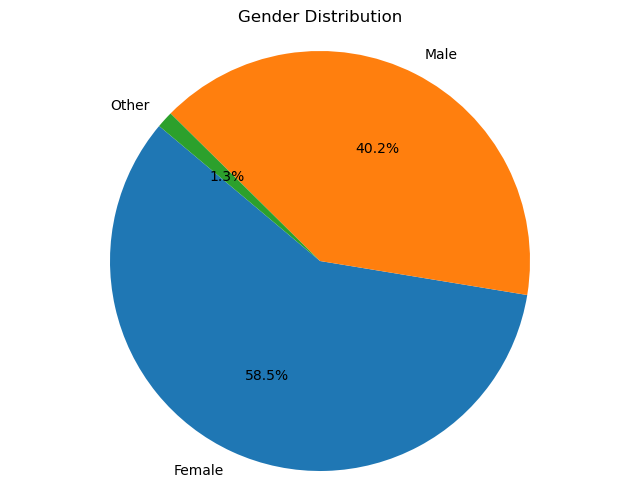

In [14]:
counts = df['Gender'].value_counts()

# Anzeigen der Zählungen
print(counts)

# Erstellen des Kuchendiagramms
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Gender Distribution')
plt.show()


20-24             165
25-29              86
over 35 years      31
30-34              27
under 20 years      2
Name: Age, dtype: int64


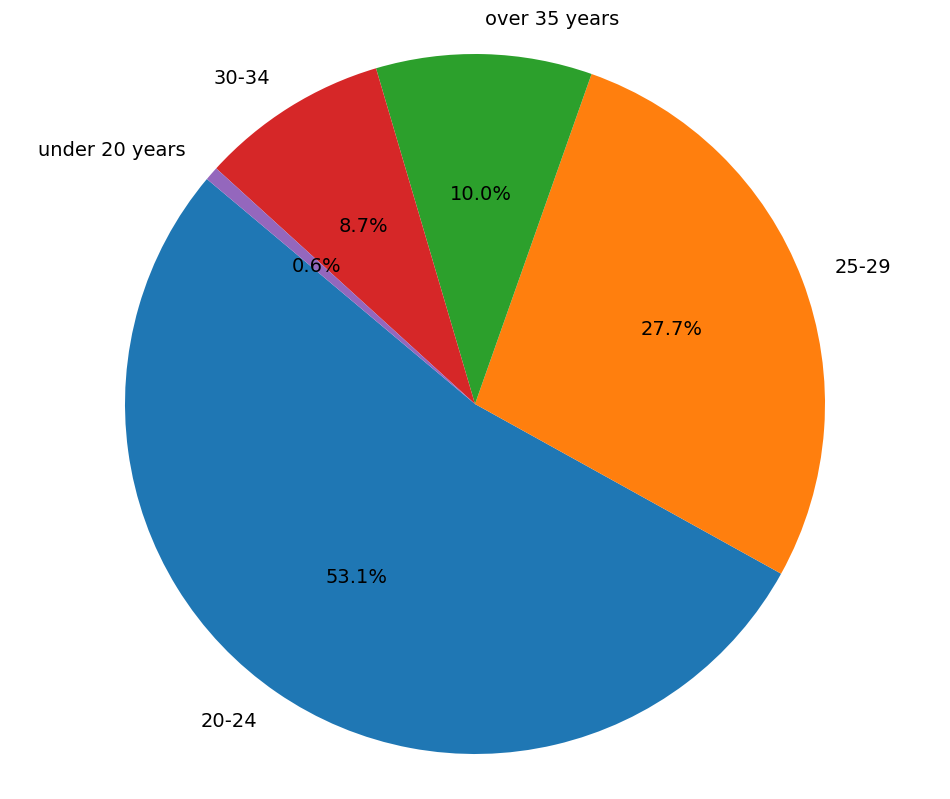

In [15]:
counts = df['Age'].value_counts()

# Anzeigen der Zählungen
print(counts)

# Erstellen des Kuchendiagramms mit größerer Schrift für die Prozentzeichen
plt.figure(figsize=(12, 10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})  

plt.axis('equal')  
# plt.title('Altersverteilung der Umfrageteilnehmer')
plt.show()


(Swiss-)German    273
English            26
French              9
Italian             3
Name: CourseLanguage, dtype: int64


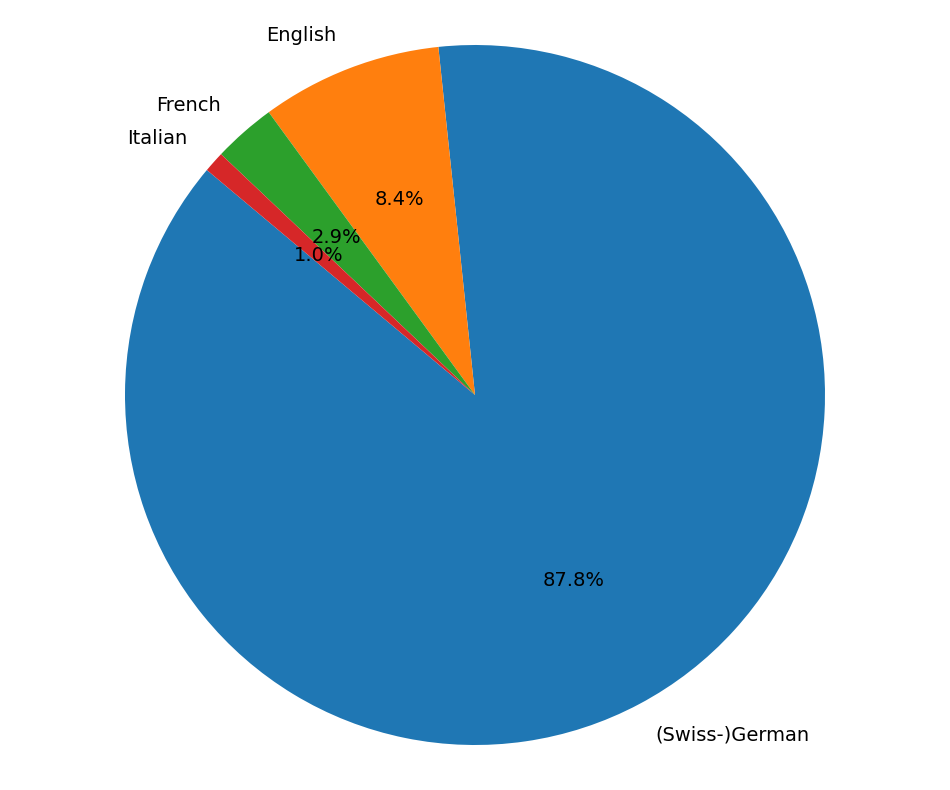

In [16]:
counts = df['CourseLanguage'].value_counts()

# Anzeigen der Zählungen
print(counts)

# Erstellen des Kuchendiagramms mit größerer Schrift für die Prozentzeichen
plt.figure(figsize=(12, 10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 14})  

plt.axis('equal')  
# plt.title('Altersverteilung der Umfrageteilnehmer')
plt.show()


Science, Technology, Engineering and Mathematics    72
Life Sciences and Medicine                          66
Business and Economics                              62
Other                                               36
Social Sciences                                     26
Law                                                 21
Communication and Media Studies                     20
Education                                            5
Arts and Humanities                                  2
Name: FieldOfStudy, dtype: int64


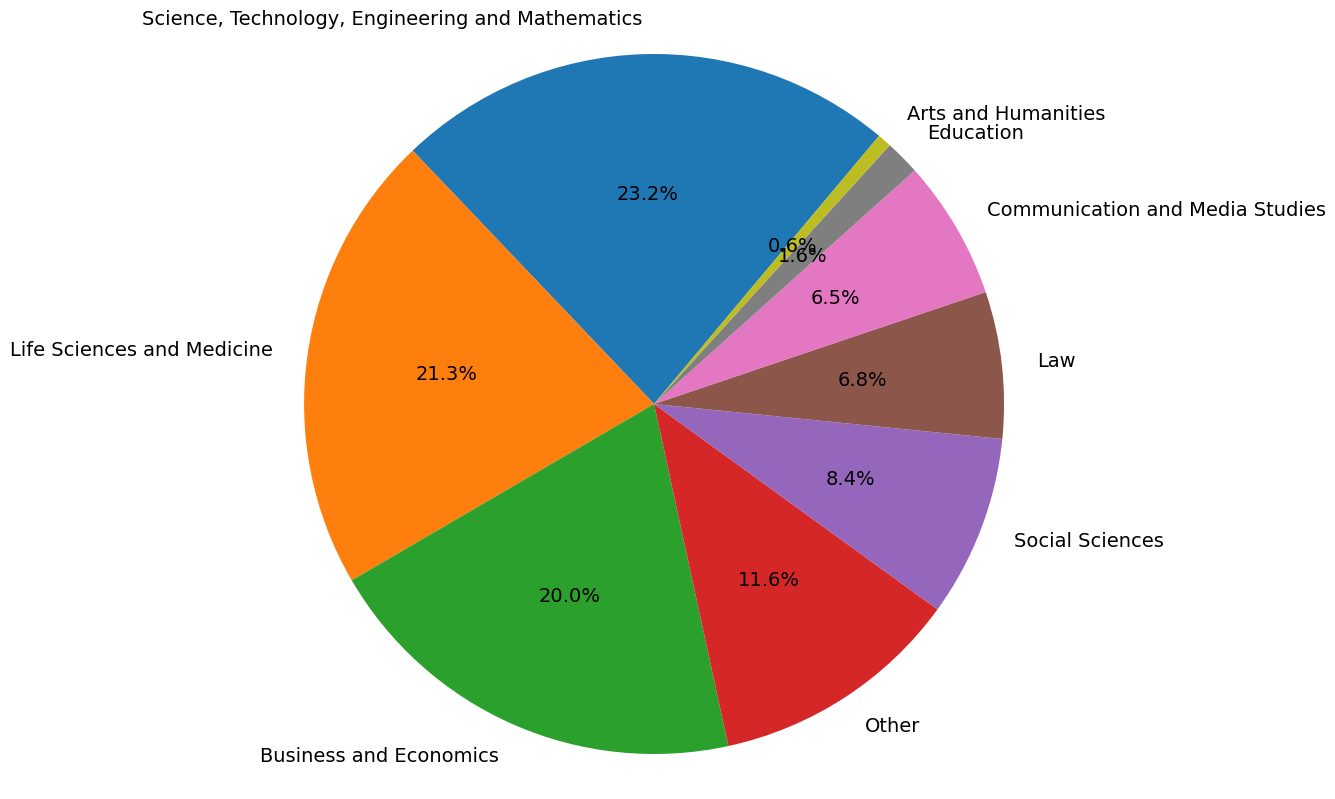

In [17]:
counts = df['FieldOfStudy'].value_counts()

# Anzeigen der Zählungen
print(counts)

# Erstellen des Kuchendiagramms mit größerer Schrift für die Prozentzeichen
plt.figure(figsize=(12, 10))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=50, textprops={'fontsize': 14})  

plt.axis('equal')  
# plt.title('Altersverteilung der Umfrageteilnehmer')
plt.show()

In [18]:
non_null_responses = df[df['FieldOfStudy_Other'].notnull() & (df['FieldOfStudy_Other'] != '')]['FieldOfStudy_Other']

# Filtere die nicht relevanten Antworten heraus
clean_responses = df['FieldOfStudy_Other'].replace(['-', 'No', 'no', 'nope', 'not really'], '')

# Entferne leere Strings nach der Bereinigung
clean_responses = clean_responses[clean_responses.str.strip().astype(bool)]

# Zähle die einzigartigen Werte (Dubletten werden einzeln gewertet)
unique_response_counts = clean_responses.value_counts()

print(unique_response_counts)

Health                              4
psychology                          2
Business IT                         2
Facility Management                 2
Linguistics                         2
Wirtschaftsinformatik               2
Nursing                             2
Applied Linguistics                 2
Interpreting (Languages)            1
IT & economy                        1
Information technology              1
Public Health                       1
Social work                         1
Health Promotion and Prevention     1
Health care                         1
Wirtschaftsinformatik               1
Architecture                        1
Social Work                         1
Ergotherapie                        1
Real Estate and FM                  1
Health and Prevention               1
Midwifery                           1
Physiotherapy                       1
Applied linguistics                 1
healthpromotion                     1
Psychologie                         1
Name: FieldO

### Usage of the different tools

In [19]:
# Liste der Kategorien
categories = ['Teams', 'Zoom', 'GoogleWorkspace', 'Slack', 'Trello', 'Notion', 'Miro', 'Mural', 'GitHub', 'Monday', 'Asana', 'Jira', 'OtherCollaborationTools']

# Überprüfen, ob mindestens eine Bewertung von 4.0 oder 3.0 in einer der Kategorien vorliegt
has_rating_4 = ((df[categories] == 4.0) | (df[categories] == 3.0)).any(axis=1)

# Zählen, wie viele Leute mindestens einmal eine Bewertung von 4.0 oder 3.0 hatten
count_rating_4 = has_rating_4.sum()

# Anzeigen der Anzahl von Personen mit mindestens einer Bewertung von 4.0 oder 3.0
print("Anzahl der Personen mit mindestens einer Bewertung von 4.0 oder 3.0:", count_rating_4)



Anzahl der Personen mit mindestens einer Bewertung von 4.0 oder 3.0: 222


In [20]:

# Liste der Tool-Spalten
categories = [
    'Teams', 'Zoom', 'GoogleWorkspace', 'Slack',
    'Trello', 'Notion', 'Miro', 'Mural', 
    'GitHub', 'Monday', 'Asana', 'Jira', 'OtherCollaborationTools'
]

# Überprüfen, ob mindestens eine Bewertung von 4.0 oder 3.0 in einer der Kategorien vorliegt
df['has_rating_4_or_3'] = ((df[categories] == 4.0) | (df[categories] == 3.0)).any(axis=1)

# Gruppiere die Daten nach 'Age' und zähle, wie viele in jeder Altersgruppe mindestens einmal eine Bewertung von 4.0 oder 3.0 angegeben haben
age_group_rating_counts = df.groupby('Age')['has_rating_4_or_3'].sum()

# Anzeigen der Anzahl von Personen mit mindestens einer Bewertung von 4.0 oder 3.0 nach Altersgruppen
print("Anzahl der Personen mit mindestens einer Bewertung von 4.0 oder 3.0 nach Altersgruppen:")
print(age_group_rating_counts)


Anzahl der Personen mit mindestens einer Bewertung von 4.0 oder 3.0 nach Altersgruppen:
Age
20-24             118
25-29              64
30-34              19
over 35 years      19
under 20 years      2
Name: has_rating_4_or_3, dtype: int64


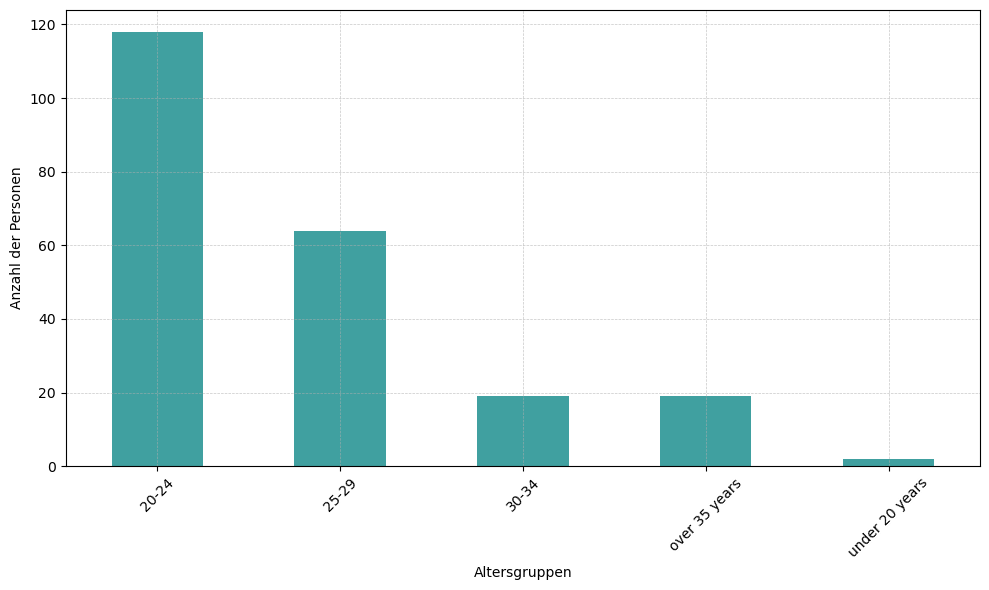

In [21]:
import matplotlib.pyplot as plt

# Erstelle das Balkendiagramm
plt.figure(figsize=(10, 6))
age_group_rating_counts.plot(kind='bar', color='teal', alpha=0.75)
plt.xlabel('Altersgruppen')
plt.ylabel('Anzahl der Personen')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()  # Optimiert die Darstellung, verhindert Überlappungen
plt.show()


In [22]:
# Liste der Tool-Spalten
categories = [
    'Teams', 'Zoom', 'GoogleWorkspace', 'Slack',
    'Trello', 'Notion', 'Miro', 'Mural', 
    'GitHub', 'Monday', 'Asana', 'Jira', 'OtherCollaborationTools'
]

# Überprüfen, ob mindestens eine Bewertung von 4.0 oder 3.0 in einer der Kategorien vorliegt
df['has_rating_4_or_3'] = ((df[categories] == 4.0) | (df[categories] == 3.0)).any(axis=1)

# Gruppiere die Daten nach 'Age' und zähle, wie viele in jeder Altersgruppe mindestens einmal eine Bewertung von 4.0 oder 3.0 angegeben haben
fieldofstudy_group_rating_counts = df.groupby('FieldOfStudy')['has_rating_4_or_3'].sum()

# Anzeigen der Anzahl von Personen mit mindestens einer Bewertung von 4.0 oder 3.0 nach Altersgruppen
print("Anzahl der Personen mit mindestens einer Bewertung von 4.0 oder 3.0 nach Studienrichtung:")
print(fieldofstudy_group_rating_counts)


Anzahl der Personen mit mindestens einer Bewertung von 4.0 oder 3.0 nach Studienrichtung:
FieldOfStudy
Arts and Humanities                                  0
Business and Economics                              48
Communication and Media Studies                     11
Education                                            3
Law                                                 10
Life Sciences and Medicine                          51
Other                                               21
Science, Technology, Engineering and Mathematics    62
Social Sciences                                     15
Name: has_rating_4_or_3, dtype: int64


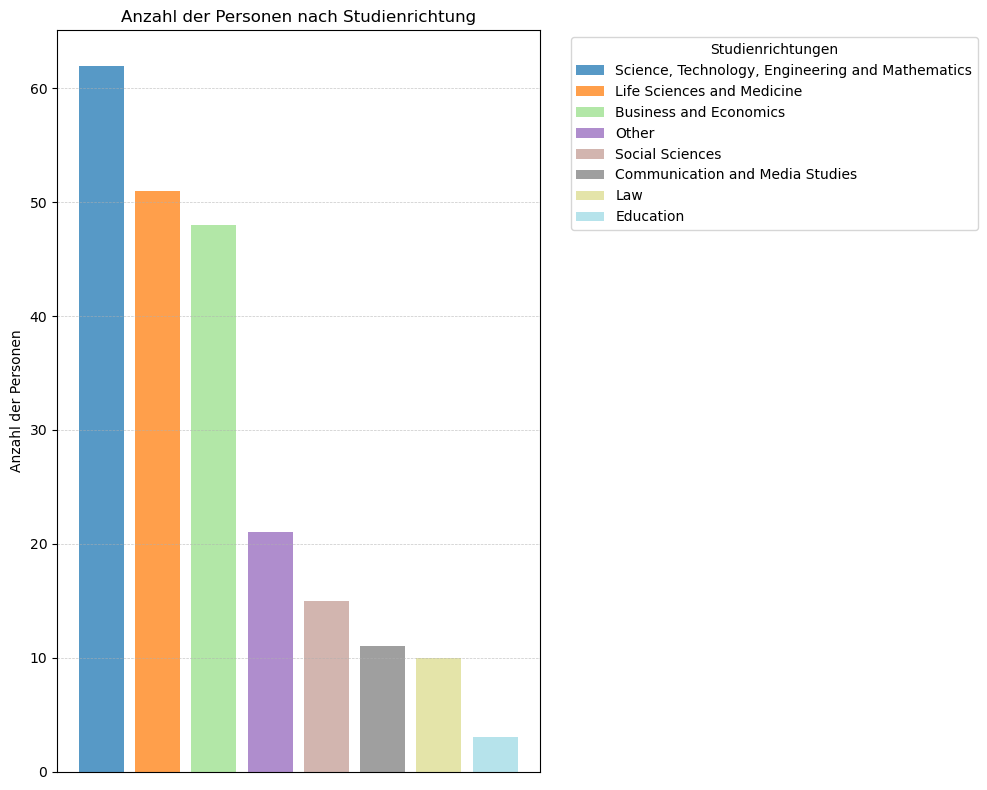

In [23]:
import matplotlib.pyplot as plt

# Angenommen, 'fieldofstudy_group_rating_counts' enthält die Zählung der Personen pro Studienrichtung
# Filtere Nullwerte heraus
fieldofstudy_group_rating_counts = fieldofstudy_group_rating_counts[fieldofstudy_group_rating_counts > 0]

# Sortiere die Werte von links nach rechts der Größe nach absteigend
fieldofstudy_group_rating_counts = fieldofstudy_group_rating_counts.sort_values(ascending=False)

# Erzeuge eine Farbpalette mit einer eindeutigen Farbe pro Kategorie
colors = plt.cm.tab20(np.linspace(0, 1, len(fieldofstudy_group_rating_counts)))

# Erstelle das Balkendiagramm, jeder Balken mit einer eigenen Farbe
plt.figure(figsize=(12, 8))
bars = plt.bar(fieldofstudy_group_rating_counts.index, 
               fieldofstudy_group_rating_counts, 
               color=colors, 
               alpha=0.75)

# Titel und Achsenbeschriftungen hinzufügen
plt.title('Anzahl der Personen nach Studienrichtung')
plt.ylabel('Anzahl der Personen')

# X-Achsen-Ticks entfernen, da wir eine Legende verwenden
plt.xticks([])

# Füge eine Legende hinzu, die außerhalb des Diagramms platziert wird
plt.legend(bars, fieldofstudy_group_rating_counts.index, 
           title="Studienrichtungen", 
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')

# Gitter hinzufügen
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Layout optimieren
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Anpassen für die Legende

# Diagramm anzeigen
plt.show()


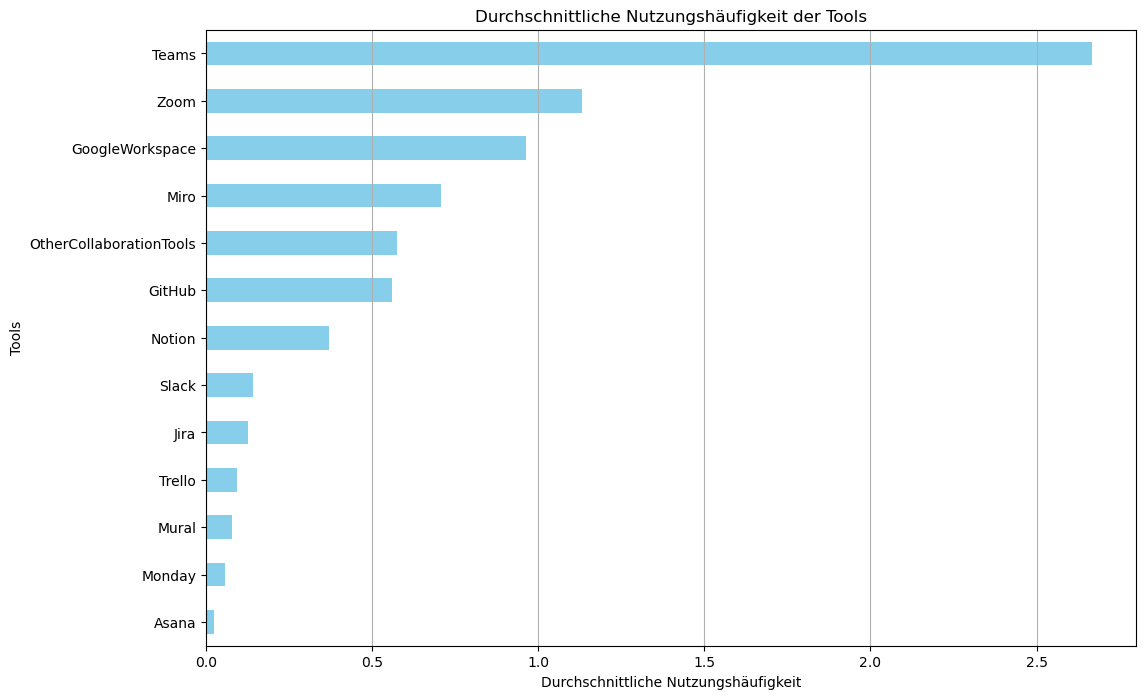

In [24]:
import matplotlib.pyplot as plt

# Spaltennamen für die Tools
tools = [
    'Teams', 'Zoom', 'GoogleWorkspace', 'Slack',
    'Trello', 'Notion', 'Miro', 'Mural', 
    'GitHub', 'Monday', 'Asana', 'Jira', 'OtherCollaborationTools'
]

# Berechnung der durchschnittlichen Nutzungshäufigkeit für jedes Tool
average_usage = df_numbers[tools].mean()
df_tools = df_numbers[tools]

# Erstellen des Balkendiagramms
plt.figure(figsize=(12, 8))
average_usage.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Durchschnittliche Nutzungshäufigkeit')
plt.ylabel('Tools')
plt.title('Durchschnittliche Nutzungshäufigkeit der Tools')
plt.grid(axis='x')

# Anzeigen des Diagramms
plt.show()


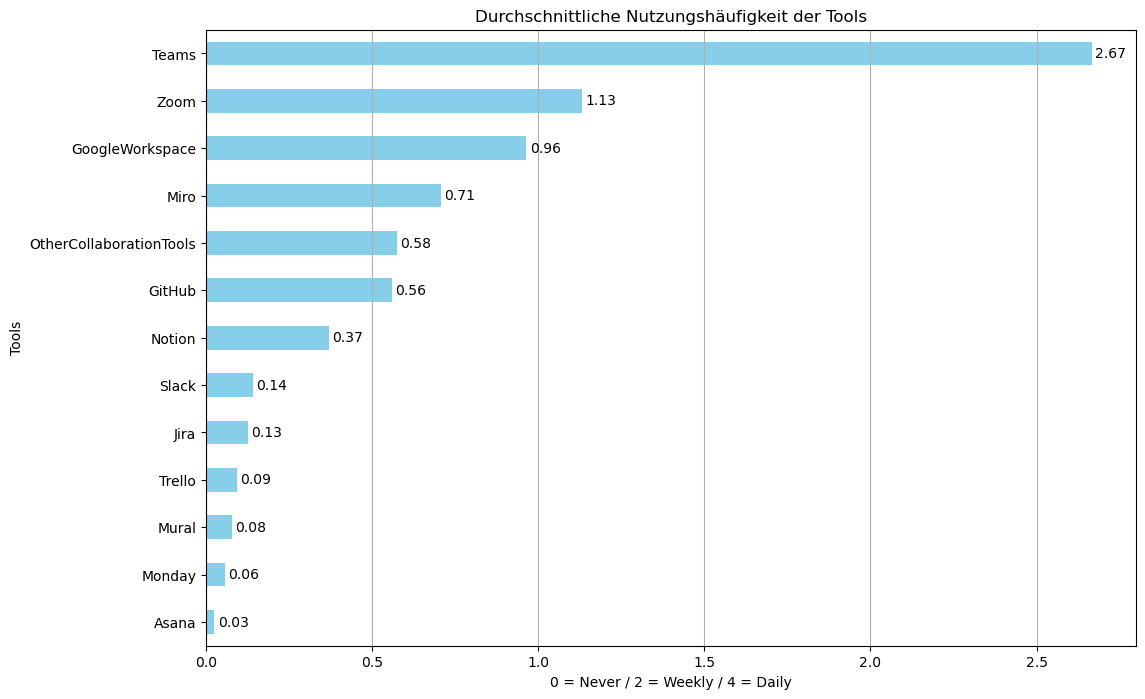

In [25]:
import matplotlib.pyplot as plt

# Spaltennamen für die Tools
tools = [
    'Teams', 'Zoom', 'GoogleWorkspace', 'Slack',
    'Trello', 'Notion', 'Miro', 'Mural', 
    'GitHub', 'Monday', 'Asana', 'Jira', 'OtherCollaborationTools'
]

# Berechnung der durchschnittlichen Nutzungshäufigkeit für jedes Tool
average_usage = df_numbers[tools].mean()
df_tools = df_numbers[tools]

# Erstellen des Balkendiagramms
plt.figure(figsize=(12, 8))
average_usage.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('0 = Never / 2 = Weekly / 4 = Daily')
plt.ylabel('Tools')
plt.title('Durchschnittliche Nutzungshäufigkeit der Tools')

# Anzeigen des Mittelwerts als Zahl
for i, v in enumerate(average_usage.sort_values()):
    plt.text(v + 0.01, i, str(round(v, 2)), color='black', va='center')

plt.grid(axis='x')

# Anzeigen des Diagramms
plt.show()


##### Breakdown 

In [26]:
df.head(3)

,ID,Gender,Age,FieldOfStudy,FieldOfStudy_Other,CourseLanguage,UseCollabTools,Teams,Zoom,GoogleWorkspace,...,ChallengeFamiliarity,ChallengeCommunication,ChallengeEngagement,ChallengeOrganization,ChallengePrivacySecurity,ChallengeSupportTraining,OtherDifficulties,ImpactOnAcademicPerformance,AdditionalComments,has_rating_4_or_3
0,1,Male,20-24,"Science, Technology, Engineering and Mathematics",NaN,(Swiss-)German,Yes,4,2,2,...,3.0,3.0,1.0,1.0,0.0,3.0,NaN,4.0,NaN,True
1,2,Male,20-24,Business and Economics,NaN,English,Yes,3,3,1,...,1.0,0.0,1.0,1.0,0.0,1.0,NaN,4.0,keine,True
2,3,Female,20-24,Law,NaN,(Swiss-)German,Yes,2,2,0,...,2.0,1.0,3.0,1.0,1.0,1.0,NaN,4.0,NaN,False


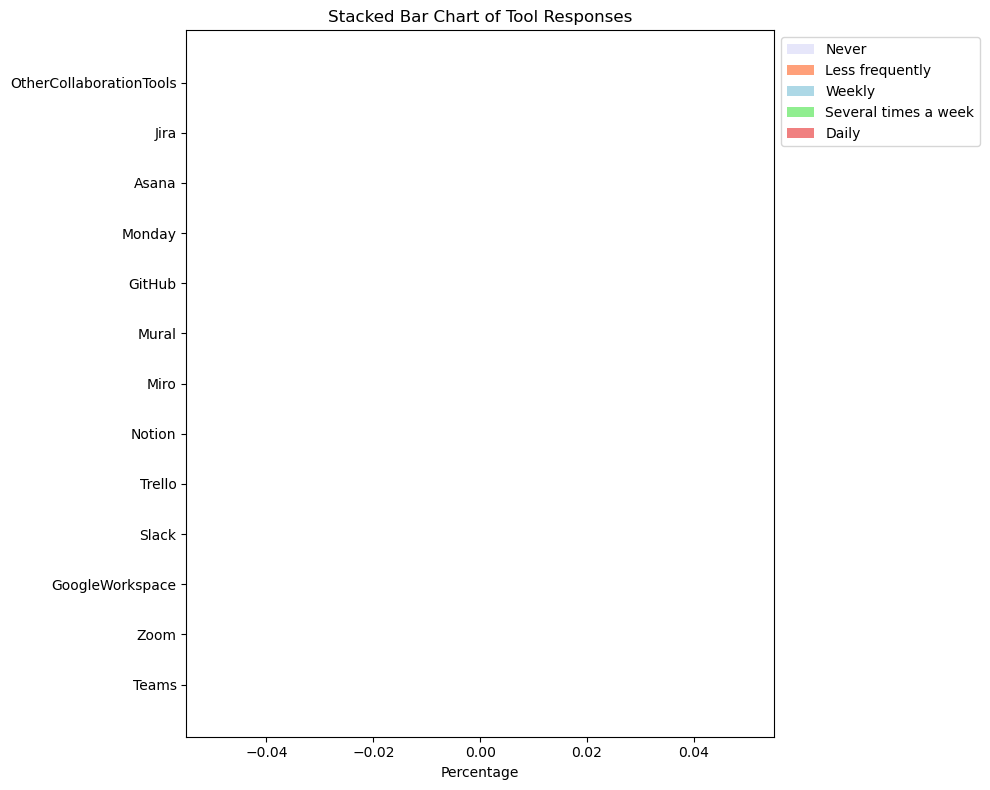

In [27]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['Teams', 'Zoom', 'GoogleWorkspace', 'Slack', 'Trello', 'Notion', 'Miro', 'Mural', 'GitHub', 'Monday', 'Asana', 'Jira', 'OtherCollaborationTools']
responses = ['Never', 'Less frequently', 'Weekly', 'Several times a week', 'Daily']  # Mögliche Antworten
colors = ['lavender', 'lightsalmon', 'lightblue', 'lightgreen', 'lightcoral']

plt.figure(figsize=(10, 8))

# Berechnung der Anteile für jede Antwortkategorie
response_percentage = {}
for response in responses:
    response_counts = [df[category].value_counts(normalize=True).get(response, 0) * 100 for category in categories]
    response_percentage[response] = sum(response_counts)

# Sortieren der Kategorien basierend auf dem Anteil von "Never"
sorted_categories = sorted(categories, key=lambda x: response_percentage['Never'] if 'Never' in response_percentage else 0, reverse=False)

# Startwerte für die Stapel
bottoms = np.zeros(len(categories))

for response, color in zip(responses, colors):
    # Berechne die Anteile für die aktuelle Antwortkategorie
    response_counts = [df[category].value_counts(normalize=True).get(response, 0) * 100 for category in sorted_categories]
    plt.barh(sorted_categories, response_counts, left=bottoms, color=color, label=f'{response}')
    # Update die Startwerte für den nächsten Stapel
    bottoms += response_counts

plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.xlabel('Percentage')
plt.title('Stacked Bar Chart of Tool Responses')
plt.tight_layout() 
plt.show()


In [28]:
# Mittelwerte pro Altersgruppe für die angegebenen Antworten berechnen
mean_values_ages_tools = df_numbers.groupby('Age').agg({
    'Teams': 'mean',
    'Zoom': 'mean',
    'GoogleWorkspace': 'mean',
    'Miro': 'mean',
    'OtherCollaborationTools': 'mean',
    'GitHub': 'mean',
    'Monday': 'mean',
    'Asana': 'mean',
    'Jira': 'mean',
    'Notion': 'mean',
    'Slack': 'mean',
    'Trello': 'mean',
    'Mural': 'mean',

})

# Berechnung der Summe aller Felder pro Alterskategorie
sum_per_age_category_tools = mean_values_ages_tools.sum(axis=1) / 11

# Anzeige der Summen pro Alterskategorie
print(sum_per_age_category_tools)



Age
20-24             0.685950
25-29             0.671247
30-34             0.632997
over 35 years     0.712610
under 20 years    0.909091
dtype: float64


In [29]:
count = df['UseOtherTools'].value_counts().sum()
print("Anzahl der Werte in der Spalte 'OtherCollaborationTools':", count)


Anzahl der Werte in der Spalte 'OtherCollaborationTools': 0


In [30]:
import pandas as pd

# Hier wird der DataFrame mit den Daten geladen
df = pd.read_csv("data/survey_cleaned.csv", delimiter=',')

# Extrahiere die Antworten aus der Spalte "UseOtherTools"
other_tools_responses = df['UseOtherTools']

# Erstelle eine leere Liste, um die extrahierten Tools zu speichern
extracted_tools = []

# Iteriere über jede Antwort in der Spalte "UseOtherTools"
for response in other_tools_responses:
    # Überprüfe, ob die Antwort ein gültiger String ist
    if isinstance(response, str):
        # Teile den Text an den Kommas und füge die extrahierten Tools zur Liste hinzu
        tools = response.split(',')
        for tool in tools:
            # Entferne führende und nachfolgende Leerzeichen
            tool = tool.strip()
            # Füge das Tool zur Liste hinzu, wenn es nicht leer ist
            if tool:
                extracted_tools.append(tool)

# Entferne Duplikate aus der Liste
unique_tools = set(extracted_tools)

# Zeige die einzigartigen Tools an
print(unique_tools)


{'for organizing myself and for collaboration in my job and other projects in comitees for example I use Nextcloud', 'WhatsApp and Signal used between the students)', 'Google Calendar', 'One Note', 'Teams', 'word', 'Jitsi', 'AI', 'WhatsApp and Signal (Moodle used by the teachers to give us information and documents. Discord', 'MS Teams', 'Microsoft Outlook', 'eventoweb', 'padlet', 'moodle', 'WhatsApp', 'but I would if I had to hand in a paper with a collegue and there is lots of research/literature tu handle.', 'Obsidian', 'VSCode LiveShare', 'OneNote', 'Sharepoint', 'SwitchCast', 'n', 'OneDrive (i dont know if this count)', 'Trados', 'Outlook', 'GoodNotes', 'Mentimeter', 'DiagrammApp', 'Miro', 'Ilias', 'Moodle (daily)', 'WebEx', 'Axure RP Team', 'whatsapp', 'OneDrive', 'Canva for presentations and creative activities', 'mentimeter', 'Moodle', 'ChatGPT', '-', 'Onedrive', 'Skype', 'microsoft word', 'menti', 'Dall-E', 'Padlet', 'Microsoft Journal', 'In my personal life', 'Skype for Busin

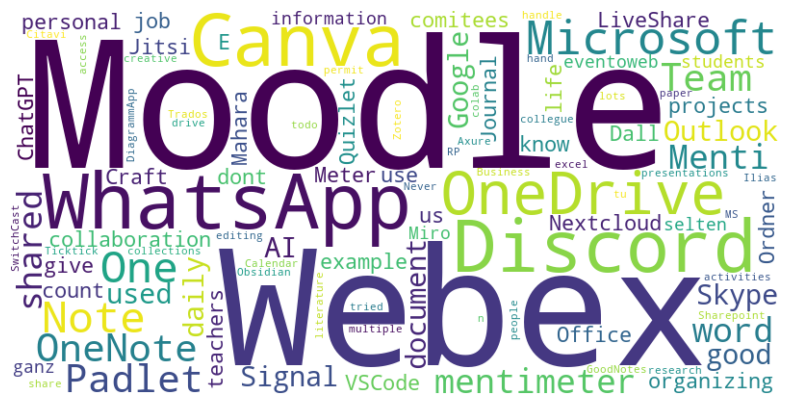

In [31]:
# Angenommen, 'df' ist dein DataFrame und 'UseOtherTools' ist bereits eine Spalte darin
clean_responses = df[df['UseOtherTools'].notnull() & (df['UseOtherTools'] != '')]['UseOtherTools']

# Filtere die nicht relevanten Antworten heraus und konvertiere sie in Strings
clean_responses = clean_responses.replace(['-', 'No', 'no', 'Nein', 'nope', 'and', 'not really'], '').astype(str)

# Entferne leere Strings nach der Bereinigung
clean_responses = clean_responses[clean_responses.str.strip().astype(bool)]

# Kombiniere alle Antworten zu einem einzigen String
all_text = ' '.join(clean_responses)

# Erstelle die WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Anzeige der WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [32]:
# Konvertiere alle Antworten in Kleinbuchstaben für eine einheitliche Suche
clean_responses_lower = clean_responses.str.lower()

# Zähle die Häufigkeiten der spezifischen Tools
moodle_count = clean_responses_lower.str.contains('moodle', case=False, na=False).sum()
webex_count = clean_responses_lower.str.contains('webex', case=False, na=False).sum()
discord_count = clean_responses_lower.str.contains('discord', case=False, na=False).sum()
whatsapp_count = clean_responses_lower.str.contains('whatsapp', case=False, na=False).sum()
onedrive_count = clean_responses_lower.str.contains('onedrive', case=False, na=False).sum()
canva_count = clean_responses_lower.str.contains('canva', case=False, na=False).sum()
onenote_count = clean_responses_lower.str.contains('onenote', case=False, na=False).sum()



print(f"Top 5 andere Tools:")
print(f"Moodle: {moodle_count}")
print(f"Webex: {webex_count}")
print(f"WhatsApp: {whatsapp_count}")
print(f"Canva: {canva_count}")
print(f"Discord: {discord_count}")
print(f"OneDrive: {onedrive_count}")
print(f"OneNote: {onenote_count}")

Top 5 andere Tools:
Moodle: 17
Webex: 15
WhatsApp: 7
Canva: 7
Discord: 6
OneDrive: 6
OneNote: 4


In [33]:
# # Kategorien für die Verwendungshäufigkeit
# categories = ['Daily', 'Several times a week', 'Weekly']

# # Sammle die Summe der täglichen und mehrmals wöchentlichen Nutzung für jedes Tool
# frequent_uses = {}
# for tool in tools:
#     # Stelle sicher, dass nur die relevanten Kategorien gezählt werden
#     frequent_uses[tool] = df[tool].isin(categories).sum()

# # Erstellen des Kuchendiagramms
# plt.figure(figsize=(10, 8))
# plt.pie(frequent_uses.values(), labels=frequent_uses.keys(), autopct='%1.1f%%', startangle=140)
# plt.title('High-Frequency Usage of Collaboration Tools')
# plt.axis('equal')  # Kreisform sichern
# plt.show()

### Criterias / Nutzwertanalyse

In [34]:
df_numbers.head()


,ID,Gender,Age,FieldOfStudy,FieldOfStudy_Other,CourseLanguage,UseCollabTools,Teams,Zoom,GoogleWorkspace,...,ChallengeFamiliarity,ChallengeCommunication,ChallengeEngagement,ChallengeOrganization,ChallengePrivacySecurity,ChallengeSupportTraining,OtherDifficulties,ImpactOnAcademicPerformance,AdditionalComments,has_rating_4_or_3
0,1,Male,20-24,"Science, Technology, Engineering and Mathematics",NaN,(Swiss-)German,Yes,4,2,2,...,3.0,3.0,1.0,1.0,0.0,3.0,NaN,4.0,NaN,True
1,2,Male,20-24,Business and Economics,NaN,English,Yes,3,3,1,...,1.0,0.0,1.0,1.0,0.0,1.0,NaN,4.0,keine,True
2,3,Female,20-24,Law,NaN,(Swiss-)German,Yes,2,2,0,...,2.0,1.0,3.0,1.0,1.0,1.0,NaN,4.0,NaN,False
3,4,Male,20-24,"Science, Technology, Engineering and Mathematics",NaN,(Swiss-)German,Yes,1,0,1,...,2.0,1.0,2.0,1.0,1.0,0.0,NaN,4.0,NaN,True
4,5,Male,20-24,"Science, Technology, Engineering and Mathematics",NaN,(Swiss-)German,Yes,4,3,2,...,3.0,4.0,4.0,1.0,0.0,1.0,NaN,5.0,NaN,True


In [35]:
# Liste der gewünschten Spalten
selected_columns = [
    'UserFriendliness', 'Functionality', 'Integration',
    'Scalability', 'Cost', 'PrivacySecurity',
    'Reliability', 'Mobility', 'Customizability',
    'Feedback', 'Accessibility', 'Reputation'
]

# Erstelle ein neues DataFrame mit den ausgewählten Spalten
df_criterias = df_numbers.loc[:, selected_columns]

df_criterias.head(6)


,UserFriendliness,Functionality,Integration,Scalability,Cost,PrivacySecurity,Reliability,Mobility,Customizability,Feedback,Accessibility,Reputation
0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,-1.0
1,2.0,2.0,2.0,-1.0,0.0,-1.0,1.0,-1.0,-1.0,-2.0,0.0,-1.0
2,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,-1.0,-1.0
7,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,0.0,0.0


In [36]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Antwortkategorien und ihre numerischen Werte
# response_mapping = {
#     'Strongly Agree': 5,
#     'Agree': 4,
#     'Neutral': 3,
#     'Disagree': 2,
#     'Strongly Disagree': 1
# }

# # Angenommen, df_criteria enthält nur die ausgewählten Spalten für die Kriterien
# # Mappe die Textantworten auf numerische Werte
# for col in df_criterias.columns:
#     df_criterias[col] = df_criterias[col].map(response_mapping)


# df_criterias.head(3)


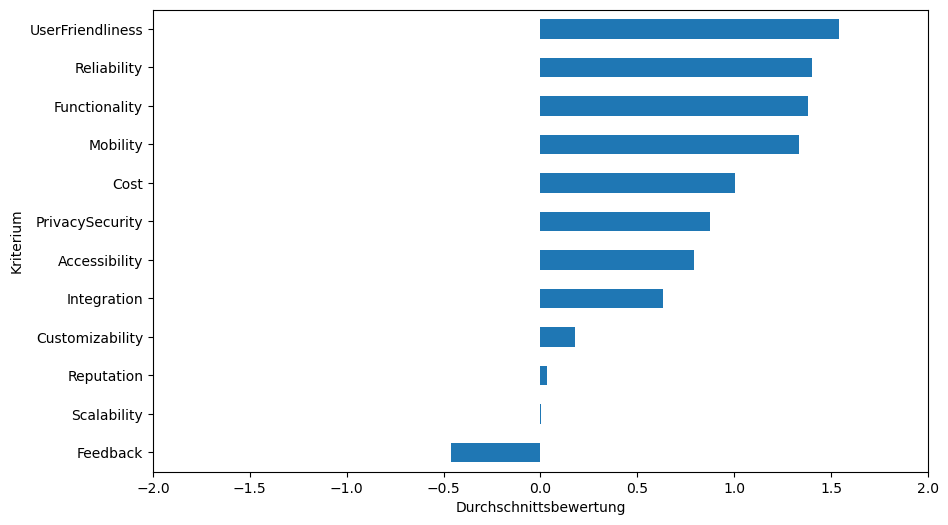

In [37]:

# Berechne den Mittelwert für jedes Kriterium
criteria_means = df_criterias.mean()

# Sortiere die Kriterien nach dem höchsten Mittelwert
criteria_means_sorted = criteria_means.sort_values(ascending=True)

# Erstelle ein Balkendiagramm für die sortierten Mittelwerte der Kriterien
plt.figure(figsize=(10, 6))
criteria_means_sorted.plot(kind='barh')
plt.xlabel('Durchschnittsbewertung')
plt.ylabel('Kriterium')
plt.xlim(-2, 2)  # Setze die Grenzen der x-Achse auf -2 bis +2
plt.show()


In [38]:
print(criteria_means_sorted.head)

<bound method NDFrame.head of Feedback           -0.463918
Scalability         0.003436
Reputation          0.034364
Customizability     0.178694
Integration         0.632302
Accessibility       0.793814
PrivacySecurity     0.876289
Cost                1.006873
Mobility            1.336770
Functionality       1.381443
Reliability         1.402062
UserFriendliness    1.539519
dtype: float64>


### Impacts

In [39]:
# for spaltenname in df.columns:
#     print(spaltenname)

In [40]:
impacts = ['ImpactOnCollaboration', 'ImpactOnOrganization', 'ImpactOnCoordination', 'ImpactOnCommunication', 'ImpactOnParticipation', 'ImpactOnMotivation']

# Erstelle ein neues DataFrame mit den ausgewählten Spalten
df_impacts = df_numbers.loc[:, impacts]

df_impacts.head(10)

,ImpactOnCollaboration,ImpactOnOrganization,ImpactOnCoordination,ImpactOnCommunication,ImpactOnParticipation,ImpactOnMotivation
0,2.0,2.0,2.0,1.0,0.0,1.0
1,1.0,2.0,0.0,1.0,-2.0,0.0
2,1.0,1.0,2.0,2.0,-1.0,1.0
3,2.0,2.0,1.0,1.0,0.0,0.0
4,2.0,2.0,2.0,2.0,1.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN
8,2.0,2.0,1.0,1.0,-1.0,-2.0
9,0.0,0.0,2.0,2.0,-1.0,-1.0
10,2.0,2.0,1.0,1.0,0.0,0.0
11,NaN,NaN,NaN,NaN,NaN,NaN


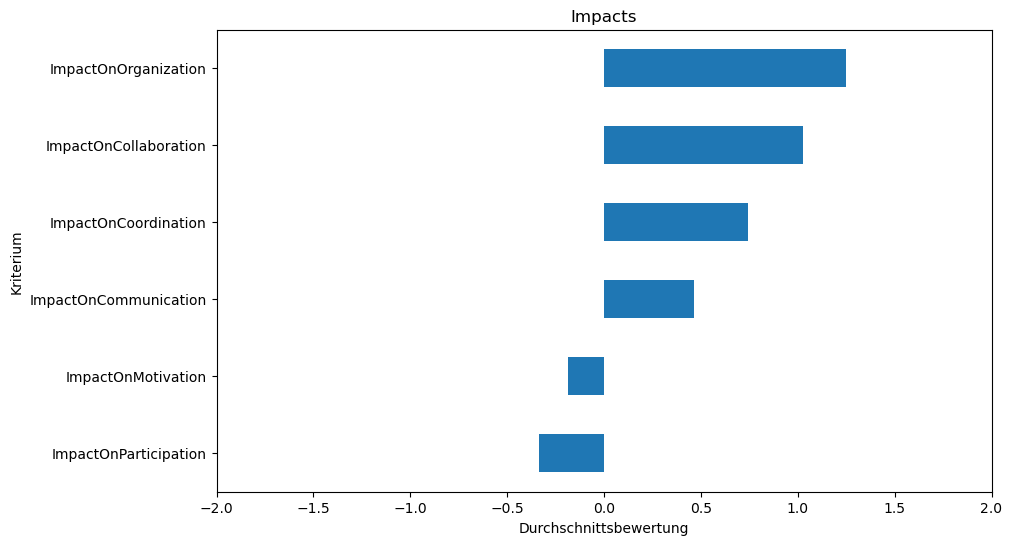

In [41]:
# Berechne den Mittelwert für jedes Tool
impacts_means = df_impacts.mean()

# Sortiere die Kriterien nach dem höchsten Mittelwert
impacts_means_sorted = impacts_means.sort_values(ascending=True)

# Erstelle ein Balkendiagramm für die sortierten Mittelwerte der Kriterien
plt.figure(figsize=(10, 6))
impacts_means_sorted.plot(kind='barh')
plt.title('Impacts')
plt.xlabel('Durchschnittsbewertung')
plt.ylabel('Kriterium')
plt.xlim(-2, 2)  
plt.show()

In [42]:
print(impacts_means_sorted.head)

<bound method NDFrame.head of ImpactOnParticipation   -0.334559
ImpactOnMotivation      -0.183824
ImpactOnCommunication    0.463235
ImpactOnCoordination     0.742647
ImpactOnCollaboration    1.029304
ImpactOnOrganization     1.250000
dtype: float64>


### Institution

In [43]:
institution = ['SatisfactionWithToolsVariety', 'EffectiveToolIntegration', 'AdequacyOfTraining', 'EffectivenessOfSupport', 'InvolvementInDecisionMaking']

# Erstelle ein neues DataFrame mit den ausgewählten Spalten
df_institution = df_numbers.loc[:, institution]

df_institution.head(10)

,SatisfactionWithToolsVariety,EffectiveToolIntegration,AdequacyOfTraining,EffectivenessOfSupport,InvolvementInDecisionMaking
0,-1.0,1.0,-1.0,1.0,-1.0
1,2.0,1.0,2.0,1.0,-2.0
2,1.0,1.0,0.0,0.0,1.0
3,1.0,1.0,1.0,0.0,0.0
4,0.0,1.0,-1.0,1.0,-1.0
7,NaN,NaN,NaN,NaN,NaN
8,-2.0,2.0,1.0,0.0,-2.0
9,1.0,1.0,0.0,0.0,-2.0
10,1.0,1.0,1.0,0.0,0.0
11,NaN,NaN,NaN,NaN,NaN


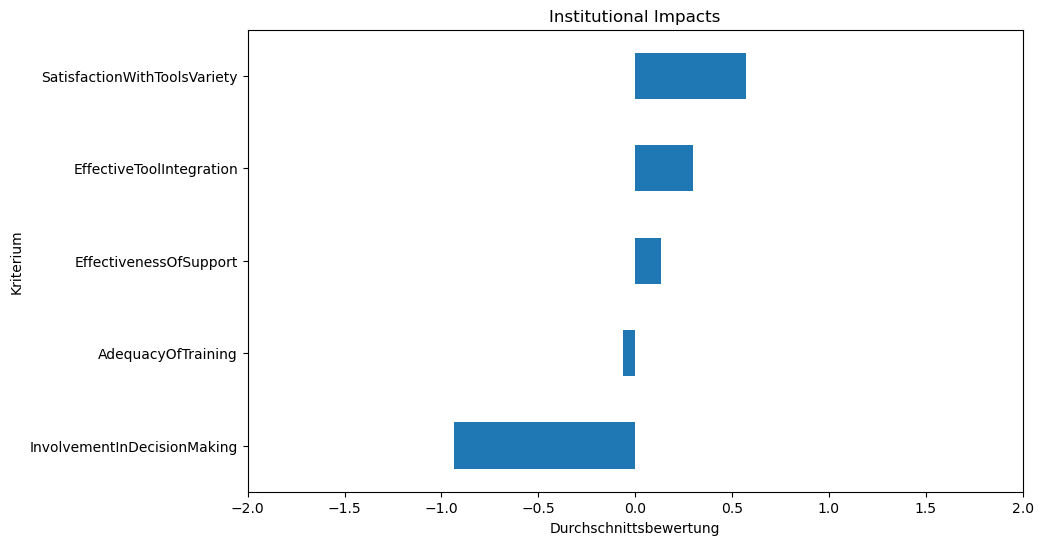

In [44]:
# Berechne den Mittelwert für jedes Tool
institution_mean = df_institution.mean()

# Sortiere die Kriterien nach dem höchsten Mittelwert
institution_mean_sorted = institution_mean.sort_values(ascending=True)

# Erstelle ein Balkendiagramm für die sortierten Mittelwerte der Kriterien
plt.figure(figsize=(10, 6))
institution_mean_sorted.plot(kind='barh')
plt.title('Institutional Impacts')
plt.xlabel('Durchschnittsbewertung')
plt.ylabel('Kriterium')
plt.xlim(-2, 2)  
plt.show()

In [45]:
print(institution_mean_sorted.head)

<bound method NDFrame.head of InvolvementInDecisionMaking    -0.936090
AdequacyOfTraining             -0.063910
EffectivenessOfSupport          0.131579
EffectiveToolIntegration        0.300752
SatisfactionWithToolsVariety    0.571429
dtype: float64>


In [46]:
institution_columns = ['SatisfactionWithToolsVariety', 'EffectiveToolIntegration', 'AdequacyOfTraining', 'EffectivenessOfSupport', 'InvolvementInDecisionMaking']
df_institution = df_numbers[['Age'] + institution_columns]

# Nun berechnen wir die Mittelwerte je Altersgruppe für jede institution Kategorie
institution_means_by_age = df_institution.groupby('Age').mean()

# Wir werden das Ergebnis ausgeben
institution_means_by_age

,SatisfactionWithToolsVariety,EffectiveToolIntegration,AdequacyOfTraining,EffectivenessOfSupport,InvolvementInDecisionMaking
Age,,,,,
20-24,0.615942,0.304348,-0.028986,0.137681,-0.811594
25-29,0.513158,0.263158,-0.131579,0.171053,-1.171053
30-34,0.565217,0.434783,0.000000,0.043478,-0.826087
over 35 years,0.500000,0.285714,-0.107143,0.071429,-1.000000
under 20 years,1.000000,0.000000,0.000000,0.000000,-1.000000


### Challenges

In [47]:
# Definiere die Spalten für die verschiedenen Herausforderungen
challenges = ['ChallengeTechnicalIssues', 'ChallengeFamiliarity', 'ChallengeCommunication',
              'ChallengeEngagement', 'ChallengeOrganization', 'ChallengePrivacySecurity',
              'ChallengeSupportTraining']

# Erstelle ein neues DataFrame mit den ausgewählten Spalten
df_challenges = df_numbers.loc[:, challenges]

df_challenges.head()


,ChallengeTechnicalIssues,ChallengeFamiliarity,ChallengeCommunication,ChallengeEngagement,ChallengeOrganization,ChallengePrivacySecurity,ChallengeSupportTraining
0,2.0,3.0,3.0,1.0,1.0,0.0,3.0
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2,2.0,2.0,1.0,3.0,1.0,1.0,1.0
3,2.0,2.0,1.0,2.0,1.0,1.0,0.0
4,4.0,3.0,4.0,4.0,1.0,0.0,1.0


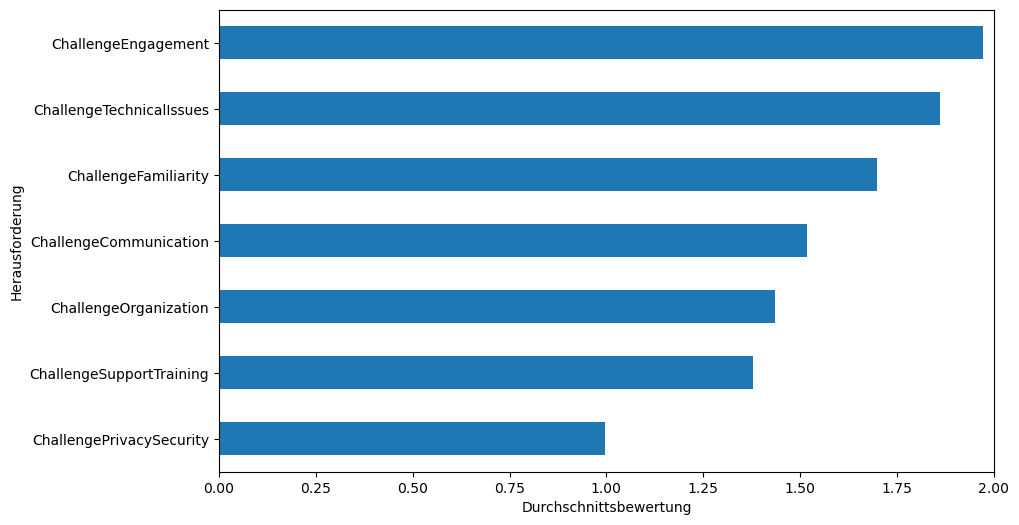

In [48]:
# Berechne den Mittelwert für jede Herausforderung
challenges_mean = df_challenges.mean()

# Sortiere die Herausforderungen nach dem höchsten Mittelwert
challenges_mean_sorted = challenges_mean.sort_values(ascending=True)

# Erstelle ein Balkendiagramm für die sortierten Mittelwerte der Herausforderungen
plt.figure(figsize=(10, 6))
challenges_mean_sorted.plot(kind='barh')
plt.xlabel('Durchschnittsbewertung')
plt.ylabel('Herausforderung')
plt.xlim(0, 2)  
plt.show()

In [49]:
print(challenges_mean_sorted.head)

<bound method NDFrame.head of ChallengePrivacySecurity    0.996139
ChallengeSupportTraining    1.378378
ChallengeOrganization       1.436293
ChallengeCommunication      1.517375
ChallengeFamiliarity        1.698842
ChallengeTechnicalIssues    1.861004
ChallengeEngagement         1.972973
dtype: float64>


In [50]:
# Extrahiere die offenen Antwortmöglichkeiten aus der Spalte "OtherDifficulties"
other_difficulties_responses = df['OtherDifficulties'].dropna().tolist()

# Filtere die Antworten, die weder "no" noch "keine" entsprechen, unabhängig von Groß- und Kleinschreibung
filtered_responses = [response for response in other_difficulties_responses if response.strip().lower() not in ["no", "-"]]

# Zeige die gefilterten Antworten als Liste an
for index, response in enumerate(filtered_responses, start=1):
    print(f"{index}. {response}")


1. Others not knowing how to use the tools
2. Good notes
3. not really, much more it faciliates working together in group poject from different locations.
4. Professors not anouncing what tools they use, and professors not using the tools in the interests of students 
5. difficulties to open uploaded documents, example(teams)
6. there are three different ones my school uses and it confuses me sometimes, which one for what
7. Synchronisation findet nicht immer gleich gut statt. So haben Personen dasselbe Dokument geöffnet, jedoch sind gewisse Aspekte vorhanden oder eben nicht mehr, da es bereits weiterbearbeitet wurde.
8. We are forced to use Teams and its a terrible tool
9. social lonelyness increase
10. Usability 
11. Keine die mir gerade einfallen.
12. audio blocks out multiple people speaking, leads to difficulties in discussions and a lack of flow when talking to each other
13. Just teachers, which do not stream their courses. It should be the normalty.
14. too much technology kill

### Impacts

In [51]:
# Definiere die Spalten für die verschiedenen Herausforderungen
performance = ['ImpactOnAcademicPerformance']

# Erstelle ein neues DataFrame mit den ausgewählten Spalten
df_performance = df_numbers.loc[:, performance]

df_performance.head()

,ImpactOnAcademicPerformance
0,4.0
1,4.0
2,4.0
3,4.0
4,5.0


Durchschnittliche Auswirkung auf die akademische Leistung: 3.1003861003861
Durchschnittliche Auswirkung auf die akademische Leistung Median 3.0


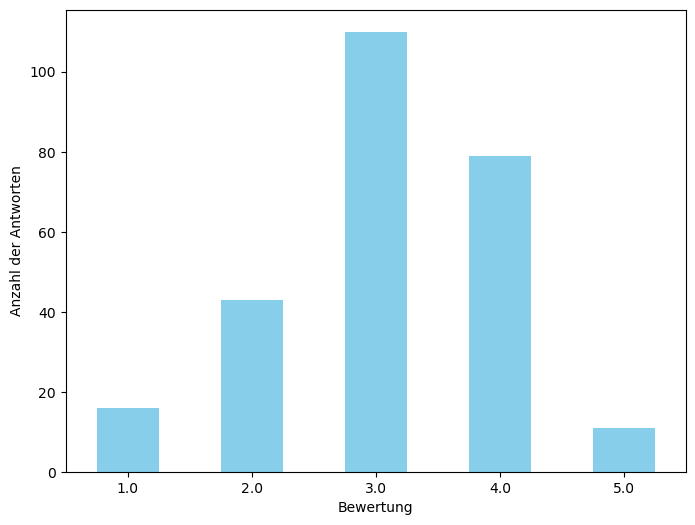

In [52]:
# Berechne den Mittelwert für die Frage "ImpactOnAcademicPerformance"
performance_mean = df_performance['ImpactOnAcademicPerformance'].mean()
performance_median = df_performance['ImpactOnAcademicPerformance'].median()

# Ausgabe des Mittelwerts
print("Durchschnittliche Auswirkung auf die akademische Leistung:", performance_mean)
print("Durchschnittliche Auswirkung auf die akademische Leistung Median", performance_median)

# Berechne die Häufigkeit der verschiedenen Bewertungen
performance_counts = df_performance['ImpactOnAcademicPerformance'].value_counts()

# Sortiere die Bewertungen nach ihrer Häufigkeit
performance_counts_sorted = performance_counts.sort_index()

# Zeige die Häufigkeit der verschiedenen Bewertungen als Bar-Plot
plt.figure(figsize=(8, 6))
performance_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Bewertung')
plt.ylabel('Anzahl der Antworten')
plt.xticks(rotation=0)
plt.show()


### Additional Comments


In [53]:
df_additionalcomments = (df['AdditionalComments'].dropna())


# Überprüfen, ob der Ordner existiert, andernfalls erstellen
if not os.path.exists(save_path):
    os.makedirs(save_path)

# Name der CSV-Datei
txt_filename = 'additionalcomments.txt'

# Vollständiger Pfad zur CSV-Datei
csv_file_path = os.path.join(save_path, txt_filename)

# DataFrame in CSV schreiben
df_additionalcomments.to_csv(csv_file_path, index=False)

print(f"Die Datei wurde erfolgreich unter '{csv_file_path}' gespeichert.")


Die Datei wurde erfolgreich unter 'data/additionalcomments.txt' gespeichert.


## Korrelationen

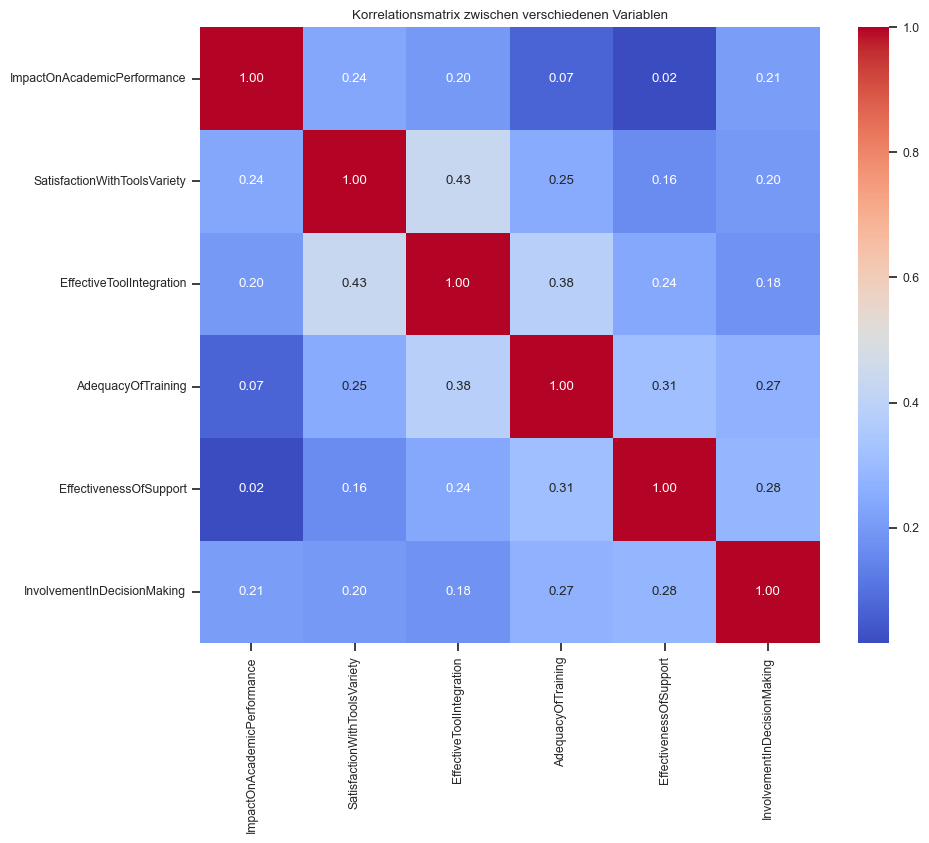

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setze das Style für die Plots
sns.set(style="ticks", font_scale=0.8)

# Auswahl der relevanten Spalten für die Korrelationsanalyse
columns_of_interest = [
    'ImpactOnAcademicPerformance', 'SatisfactionWithToolsVariety', 
    'EffectiveToolIntegration', 'AdequacyOfTraining', 
    'EffectivenessOfSupport', 'InvolvementInDecisionMaking'
]

# Erstelle eine Korrelationsmatrix
correlation_matrix = df_numbers[columns_of_interest].corr()

# Visualisierung der Korrelationsmatrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korrelationsmatrix zwischen verschiedenen Variablen')
plt.show()


In [55]:
# Filtern der relevanten Korrelationen
relevant_correlations = correlation_matrix[(correlation_matrix >= 0.4) | (correlation_matrix <= -0.4) | (correlation_matrix == 1.0)]

# Anzeige der relevanten Korrelationen
for column in relevant_correlations.columns:
    relevant = relevant_correlations[column].dropna()
    if not relevant.empty:
        print(f"Starke Korrelationen für '{column}':")
        print(relevant, end='\n\n')


Starke Korrelationen für 'ImpactOnAcademicPerformance':
ImpactOnAcademicPerformance    1.0
Name: ImpactOnAcademicPerformance, dtype: float64

Starke Korrelationen für 'SatisfactionWithToolsVariety':
SatisfactionWithToolsVariety    1.000000
EffectiveToolIntegration        0.432632
Name: SatisfactionWithToolsVariety, dtype: float64

Starke Korrelationen für 'EffectiveToolIntegration':
SatisfactionWithToolsVariety    0.432632
EffectiveToolIntegration        1.000000
Name: EffectiveToolIntegration, dtype: float64

Starke Korrelationen für 'AdequacyOfTraining':
AdequacyOfTraining    1.0
Name: AdequacyOfTraining, dtype: float64

Starke Korrelationen für 'EffectivenessOfSupport':
EffectivenessOfSupport    1.0
Name: EffectivenessOfSupport, dtype: float64

Starke Korrelationen für 'InvolvementInDecisionMaking':
InvolvementInDecisionMaking    1.0
Name: InvolvementInDecisionMaking, dtype: float64



## Einzelanalysen

In [56]:
import pandas as pd

# Mittelwerte pro Studiengang für die angegebenen Antworten berechnen
mean_values = df_numbers.groupby('FieldOfStudy').agg({
    'ImpactOnCollaboration': 'mean',
    'ImpactOnOrganization': 'mean',
    'ImpactOnCoordination': 'mean',
    'ImpactOnCommunication': 'mean',
    'ImpactOnParticipation': 'mean',
    'ImpactOnMotivation': 'mean',
    'SatisfactionWithToolsVariety': 'mean',
    'EffectiveToolIntegration': 'mean',
    'AdequacyOfTraining': 'mean',
    'EffectivenessOfSupport': 'mean',
    'InvolvementInDecisionMaking': 'mean'
})

# Funktion zur Hervorhebung der höchsten und niedrigsten Werte in sanfteren Farben
def highlight_extremes(s):
    is_max = s == s.max()
    is_min = s == s.min()
    max_color = 'background-color: lightgreen'
    min_color = 'background-color: lightcoral'
    return [max_color if v else min_color if w else '' for v, w in zip(is_max, is_min)]


# Anwendung der Funktion auf den DataFrame
styled_mean_values = mean_values.style.apply(highlight_extremes)

# Anzeige des hervorgehobenen DataFrames
styled_mean_values


,ImpactOnCollaboration,ImpactOnOrganization,ImpactOnCoordination,ImpactOnCommunication,ImpactOnParticipation,ImpactOnMotivation,SatisfactionWithToolsVariety,EffectiveToolIntegration,AdequacyOfTraining,EffectivenessOfSupport,InvolvementInDecisionMaking
FieldOfStudy,,,,,,,,,,,
Arts and Humanities,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.500000,0.500000,-0.500000,0.500000,-0.500000
Business and Economics,1.087719,1.315789,0.842105,0.456140,-0.385965,-0.175439,0.727273,0.363636,-0.054545,0.163636,-0.836364
Communication and Media Studies,0.785714,1.214286,0.785714,0.214286,-0.785714,-1.000000,1.000000,0.571429,0.142857,0.142857,-1.000000
Education,1.000000,1.000000,1.000000,0.000000,-0.600000,0.200000,0.400000,0.200000,0.000000,0.200000,-1.200000
Law,1.238095,1.428571,1.000000,0.666667,0.047619,0.380952,0.500000,0.000000,-0.550000,-0.400000,-0.900000
Life Sciences and Medicine,0.877193,1.160714,0.553571,0.357143,-0.428571,-0.357143,0.553571,0.428571,0.000000,0.232143,-1.017857
Other,0.833333,1.200000,0.766667,0.600000,-0.333333,-0.266667,0.379310,0.103448,0.103448,0.448276,-0.827586
"Science, Technology, Engineering and Mathematics",1.230769,1.215385,0.738462,0.538462,-0.246154,-0.015385,0.593750,0.296875,-0.062500,0.078125,-0.937500
Social Sciences,0.904762,1.428571,0.571429,0.333333,-0.380952,-0.333333,0.100000,0.150000,-0.200000,-0.050000,-1.150000


In [57]:
# Mittelwerte pro Studiengang für die angegebenen Antworten berechnen
mean_values_ages = df_numbers.groupby('Age').agg({
    'ImpactOnCollaboration': 'mean',
    'ImpactOnOrganization': 'mean',
    'ImpactOnCoordination': 'mean',
    'ImpactOnCommunication': 'mean',
    'ImpactOnParticipation': 'mean',
    'ImpactOnMotivation': 'mean',
    'SatisfactionWithToolsVariety': 'mean',
    'EffectiveToolIntegration': 'mean',
    'AdequacyOfTraining': 'mean',
    'EffectivenessOfSupport': 'mean',
    'InvolvementInDecisionMaking': 'mean'
})

# Funktion zur Hervorhebung der höchsten und niedrigsten Werte in sanfteren Farben
def highlight_extremes(s):
    is_max = s == s.max()
    is_min = s == s.min()
    max_color = 'background-color: lightgreen'
    min_color = 'background-color: lightcoral'
    return [max_color if v else min_color if w else '' for v, w in zip(is_max, is_min)]


# Anwendung der Funktion auf den DataFrame
styled_mean_values_ages = mean_values_ages.style.apply(highlight_extremes)

# Anzeige des hervorgehobenen DataFrames
styled_mean_values_ages


,ImpactOnCollaboration,ImpactOnOrganization,ImpactOnCoordination,ImpactOnCommunication,ImpactOnParticipation,ImpactOnMotivation,SatisfactionWithToolsVariety,EffectiveToolIntegration,AdequacyOfTraining,EffectivenessOfSupport,InvolvementInDecisionMaking
Age,,,,,,,,,,,
20-24,0.978723,1.241135,0.780142,0.489362,-0.340426,-0.191489,0.615942,0.304348,-0.028986,0.137681,-0.811594
25-29,1.153846,1.363636,0.701299,0.493506,-0.363636,-0.155844,0.513158,0.263158,-0.131579,0.171053,-1.171053
30-34,1.260870,1.130435,0.782609,0.391304,-0.086957,-0.130435,0.565217,0.434783,0.000000,0.043478,-0.826087
over 35 years,0.766667,1.100000,0.633333,0.333333,-0.500000,-0.266667,0.500000,0.285714,-0.107143,0.071429,-1.000000
under 20 years,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000


In [64]:
# Mittelwerte pro Altersgruppe für die angegebenen Antworten berechnen
mean_values_ages = df_numbers.groupby('Age').agg({
    'ImpactOnCollaboration': 'mean',
    'ImpactOnOrganization': 'mean',
    'ImpactOnCoordination': 'mean',
    'ImpactOnCommunication': 'mean',
    'ImpactOnParticipation': 'mean',
    'ImpactOnMotivation': 'mean',
})

# Berechnung der Summe aller Felder pro Alterskategorie
sum_per_age_category = mean_values_ages.sum(axis=1) / 11

# Anzeige der Summen pro Alterskategorie
print(sum_per_age_category)


Age
20-24             0.268859
25-29             0.290255
30-34             0.304348
over 35 years     0.187879
under 20 years    0.454545
dtype: float64


In [59]:
# Mittelwerte pro Altersgruppe für die angegebenen Antworten berechnen
mean_values_ages = df_numbers.groupby('Age').agg({
    'SatisfactionWithToolsVariety': 'mean',
    'EffectiveToolIntegration': 'mean',
    'AdequacyOfTraining': 'mean',
    'EffectivenessOfSupport': 'mean',
    'InvolvementInDecisionMaking': 'mean'
})

# Berechnung der Summe aller Felder pro Alterskategorie
sum_per_age_category = mean_values_ages.sum(axis=1) / 11

# Anzeige der Summen pro Alterskategorie
print(sum_per_age_category)


Age
20-24             0.019763
25-29            -0.032297
30-34             0.019763
over 35 years    -0.022727
under 20 years    0.000000
dtype: float64


In [60]:
# Filtern des DataFrames nach den Geschlechtern male und female
df_gender_filtered = df_numbers[df_numbers['Gender'].isin(['Male', 'Female'])]

# Mittelwerte pro Geschlecht für die angegebenen Antworten berechnen
mean_values_gender = df_gender_filtered.groupby('Gender').agg({
    'ImpactOnCollaboration': 'mean',
    'ImpactOnOrganization': 'mean',
    'ImpactOnCoordination': 'mean',
    'ImpactOnCommunication': 'mean',
    'ImpactOnParticipation': 'mean',
    'ImpactOnMotivation': 'mean',
    'SatisfactionWithToolsVariety': 'mean',
    'EffectiveToolIntegration': 'mean',
    'AdequacyOfTraining': 'mean',
    'EffectivenessOfSupport': 'mean',
    'InvolvementInDecisionMaking': 'mean'
})

# Funktion zur Hervorhebung der höchsten und niedrigsten Werte in sanfteren Farben
def highlight_extremes(s):
    is_max = s == s.max()
    is_min = s == s.min()
    max_color = 'background-color: lightgreen'
    min_color = 'background-color: lightcoral'
    return [max_color if v else min_color if w else '' for v, w in zip(is_max, is_min)]

# Anwendung der Funktion auf den DataFrame
styled_mean_values_gender = mean_values_gender.style.apply(highlight_extremes)

# Anzeige des hervorgehobenen DataFrames
styled_mean_values_gender


,ImpactOnCollaboration,ImpactOnOrganization,ImpactOnCoordination,ImpactOnCommunication,ImpactOnParticipation,ImpactOnMotivation,SatisfactionWithToolsVariety,EffectiveToolIntegration,AdequacyOfTraining,EffectivenessOfSupport,InvolvementInDecisionMaking
Gender,,,,,,,,,,,
Female,0.960784,1.269737,0.750000,0.480263,-0.421053,-0.230263,0.684564,0.315436,-0.040268,0.067114,-0.939597
Male,1.112069,1.241379,0.732759,0.439655,-0.241379,-0.137931,0.407080,0.283186,-0.061947,0.194690,-0.938053


In [61]:
# Mittelwerte pro Studiengang für die angegebenen Antworten berechnen
mean_values_language = df_numbers.groupby('CourseLanguage').agg({
    'ImpactOnCollaboration': 'mean',
    'ImpactOnOrganization': 'mean',
    'ImpactOnCoordination': 'mean',
    'ImpactOnCommunication': 'mean',
    'ImpactOnParticipation': 'mean',
    'ImpactOnMotivation': 'mean',
    'SatisfactionWithToolsVariety': 'mean',
    'EffectiveToolIntegration': 'mean',
    'AdequacyOfTraining': 'mean',
    'EffectivenessOfSupport': 'mean',
    'InvolvementInDecisionMaking': 'mean'
})

# Funktion zur Hervorhebung der höchsten und niedrigsten Werte in sanfteren Farben
def highlight_extremes(s):
    is_max = s == s.max()
    is_min = s == s.min()
    max_color = 'background-color: lightgreen'
    min_color = 'background-color: lightcoral'
    return [max_color if v else min_color if w else '' for v, w in zip(is_max, is_min)]


# Anwendung der Funktion auf den DataFrame
styled_mean_values_language = mean_values_language.style.apply(highlight_extremes)

# Anzeige des hervorgehobenen DataFrames
styled_mean_values_language


,ImpactOnCollaboration,ImpactOnOrganization,ImpactOnCoordination,ImpactOnCommunication,ImpactOnParticipation,ImpactOnMotivation,SatisfactionWithToolsVariety,EffectiveToolIntegration,AdequacyOfTraining,EffectivenessOfSupport,InvolvementInDecisionMaking
CourseLanguage,,,,,,,,,,,
(Swiss-)German,0.978903,1.216102,0.707627,0.411017,-0.423729,-0.283898,0.552174,0.295652,-0.013043,0.156522,-0.895652
English,1.083333,1.250000,0.583333,0.375000,-0.333333,0.000000,0.833333,0.416667,-0.208333,0.333333,-1.125000
French,1.888889,1.888889,1.777778,1.666667,1.555556,1.222222,0.555556,0.444444,-0.777778,-0.777778,-1.222222
Italian,2.000000,2.000000,1.666667,1.666667,1.000000,2.000000,0.000000,-0.666667,-0.666667,-0.666667,-1.666667


In [62]:
# Mittelwerte pro Studiengang für die angegebenen Antworten berechnen
mean_values_institution = df_numbers.groupby('CourseLanguage').agg({
    'SatisfactionWithToolsVariety': 'mean',
    'EffectiveToolIntegration': 'mean',
    'AdequacyOfTraining': 'mean',
    'EffectivenessOfSupport': 'mean',
    'InvolvementInDecisionMaking': 'mean'
})

# Funktion zur Hervorhebung der höchsten und niedrigsten Werte in sanfteren Farben
def highlight_extremes(s):
    is_max = s == s.max()
    is_min = s == s.min()
    max_color = 'background-color: lightgreen'
    min_color = 'background-color: lightcoral'
    return [max_color if v else min_color if w else '' for v, w in zip(is_max, is_min)]


# Anwendung der Funktion auf den DataFrame
styled_mean_values_institution = mean_values_institution.style.apply(highlight_extremes)

# Anzeige des hervorgehobenen DataFrames
styled_mean_values_institution


,SatisfactionWithToolsVariety,EffectiveToolIntegration,AdequacyOfTraining,EffectivenessOfSupport,InvolvementInDecisionMaking
CourseLanguage,,,,,
(Swiss-)German,0.552174,0.295652,-0.013043,0.156522,-0.895652
English,0.833333,0.416667,-0.208333,0.333333,-1.125000
French,0.555556,0.444444,-0.777778,-0.777778,-1.222222
Italian,0.000000,-0.666667,-0.666667,-0.666667,-1.666667


## Footer

In [63]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-04-20 10:24:35
Python Version: 3.10.11
-----------------------------------
